### Simulation/Solution of Van Der Pol Oscillator

#### Using state independent diffusions

Solving the SDE using the Explicit-explicit method
Simulation 1/5
Simulation 2/5
Simulation 3/5
Simulation 4/5
Simulation 5/5


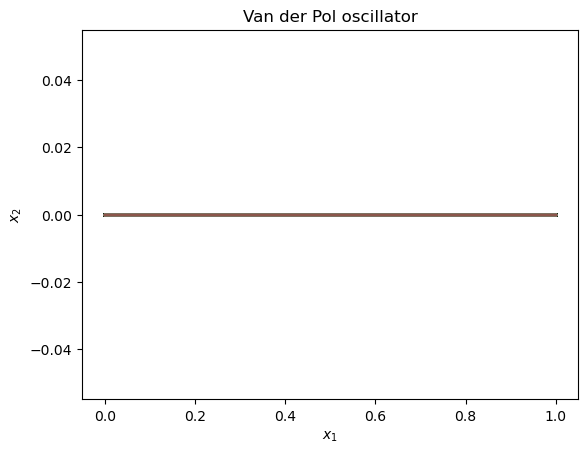

In [1]:
import numpy as np
from SDE_solver import SDESolver
import matplotlib.pyplot as plt
from VDP_system import vdp_drift, diff_state_dependent, diff_state_independent
from wiener_process import standard_wiener_process

# Set the initial conditions
mu = 3
sigma=1.0
x0 = np.array([0.5, 0.5])
p = np.array([mu, sigma])

tf = 5*mu
nW = 1
N = 1000
Ns = 5
seed = 100

# initialise solver
sde_solver = SDESolver()


print("Solving the SDE using the Explicit-explicit method")

# Getting disturbances via the standard Wiener process
W, T, _ = standard_wiener_process(tf, N, nW, Ns, seed=seed)

X = np.zeros((len(x0), N+1, Ns))
X_ns = np.zeros((len(x0), N+1))

for i in range(Ns):
    print(f"Simulation {i+1}/{Ns}")

    # Something wrong in solver - Needs to be fixed

    
    X[:,:,i] = sde_solver.explicit_explicit(vdp_drift, diff_state_independent,
                                            T, x0, W[:,:,i], p)


# Performing non-stochastic simulation
# X_ns = sde_solver.explicit_explicit(vdp_drift, diff_state_independent,
#                                             T, x0, W[:,:, 4], p)


# print(f"X_ns: {X_ns}")

# Plotting the results
plt.figure()
plt.plot(X[0,:,0])
plt.plot(X[0,:,1])
plt.plot(X[0,:,2])
plt.plot(X[0,:,3])
plt.plot(X[0,:,4])
plt.plot(X_ns, label="Non-stochastic")
plt.title("Van der Pol oscillator")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.show()
